In [97]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

import datetime

from sklearn.metrics import mean_absolute_error

from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

In [98]:
df = pd.read_csv("wind_dataset.csv")
df.head()

,DATE,WIND,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G
0,1961-01-01,13.67,0,0.2,0.0,9.5,0.0,3.7,-1.0
1,1961-01-02,11.50,0,5.1,0.0,7.2,0.0,4.2,1.1
2,1961-01-03,11.25,0,0.4,0.0,5.5,0.0,0.5,-0.5
3,1961-01-04,8.63,0,0.2,0.0,5.6,0.0,0.4,-3.2
4,1961-01-05,11.92,0,10.4,0.0,7.2,1.0,-1.5,-7.5


In [99]:
df

,DATE,WIND,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G
0,1961-01-01,13.67,0,0.2,0.0,9.5,0.0,3.7,-1.0
1,1961-01-02,11.50,0,5.1,0.0,7.2,0.0,4.2,1.1
2,1961-01-03,11.25,0,0.4,0.0,5.5,0.0,0.5,-0.5
3,1961-01-04,8.63,0,0.2,0.0,5.6,0.0,0.4,-3.2
4,1961-01-05,11.92,0,10.4,0.0,7.2,1.0,-1.5,-7.5
...,...,...,...,...,...,...,...,...,...
6569,1978-12-27,14.46,0,16.8,0.0,9.8,0.0,4.0,0.0
6570,1978-12-28,14.33,0,16.0,0.0,9.1,0.0,8.5,8.0
6571,1978-12-29,19.17,0,14.7,0.0,5.0,0.0,3.5,3.2
6572,1978-12-30,18.08,0,4.9,0.0,2.9,0.0,0.3,-0.5


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6574 entries, 0 to 6573
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DATE     6574 non-null   object 
 1   WIND     6574 non-null   float64
 2   IND      6574 non-null   int64  
 3   RAIN     6574 non-null   float64
 4   IND.1    6513 non-null   float64
 5   T.MAX    5953 non-null   float64
 6   IND.2    6513 non-null   float64
 7   T.MIN    5900 non-null   float64
 8   T.MIN.G  6214 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 462.4+ KB


In [101]:
df['DATE']=pd.to_datetime(df['DATE'])

<Axes: xlabel='DATE'>

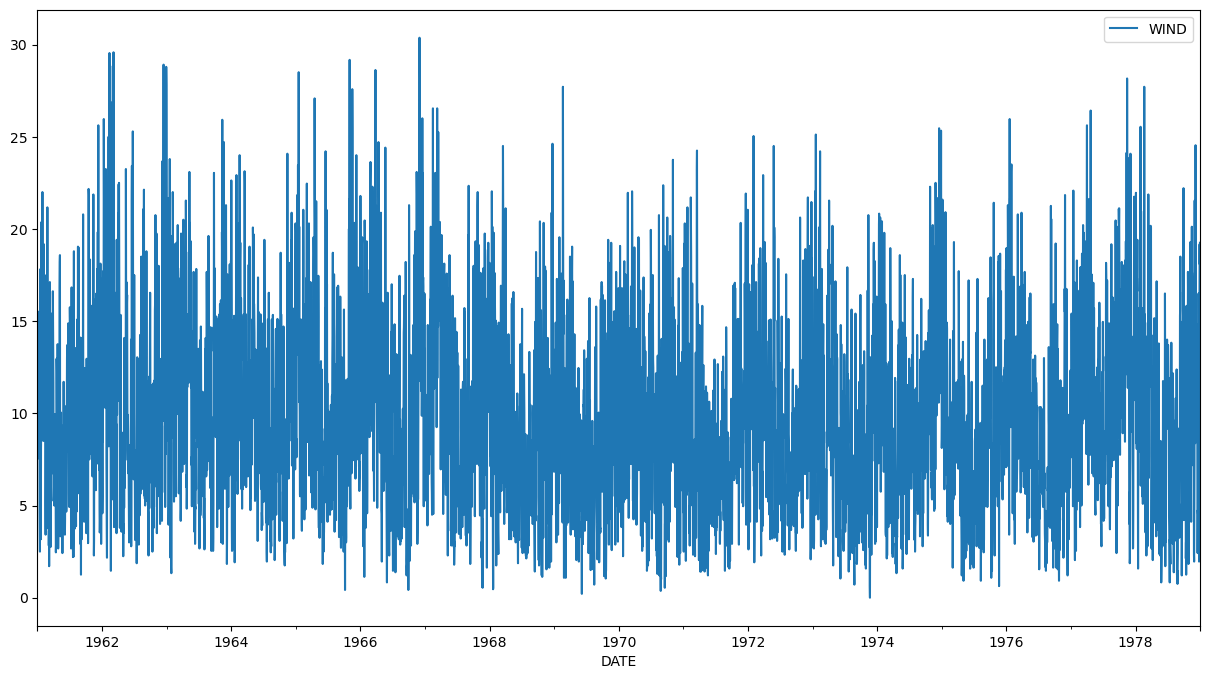

In [102]:
df.plot(x='DATE',y='WIND',figsize=(15,8))

<Axes: >

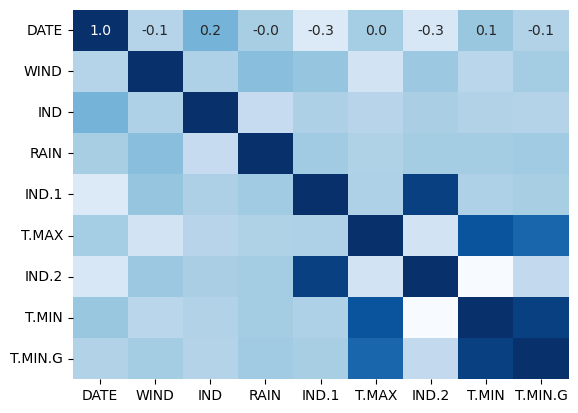

In [103]:
sns.heatmap(df.corr(),annot=True, cbar=False, cmap='Blues', fmt='.1f')

<Axes: >

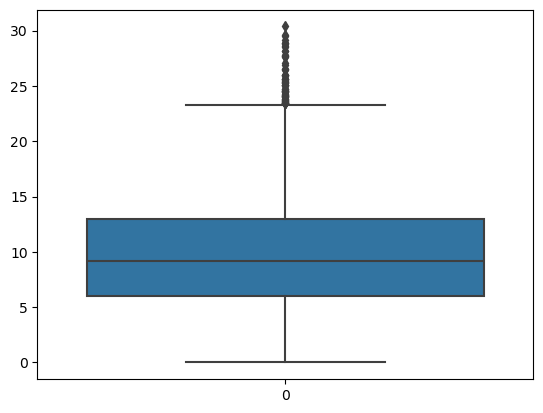

In [104]:
sns.boxplot(df['WIND'])

<Axes: >

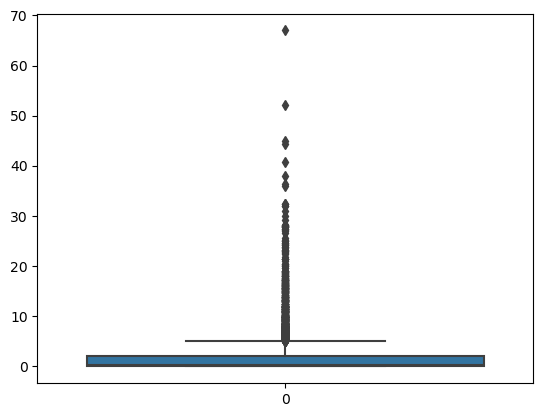

In [105]:
sns.boxplot(df['RAIN'])

<Axes: >

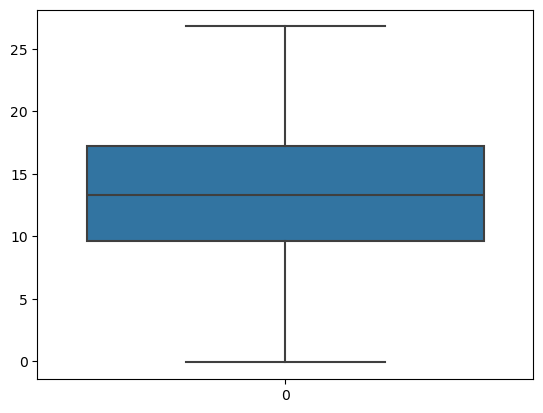

In [106]:
sns.boxplot(df['T.MAX'])

<Axes: >

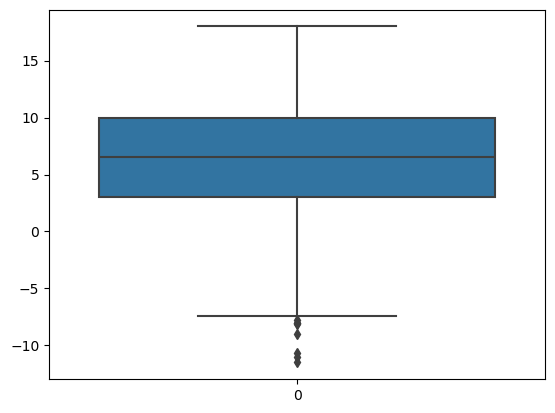

In [107]:
sns.boxplot(df['T.MIN'])

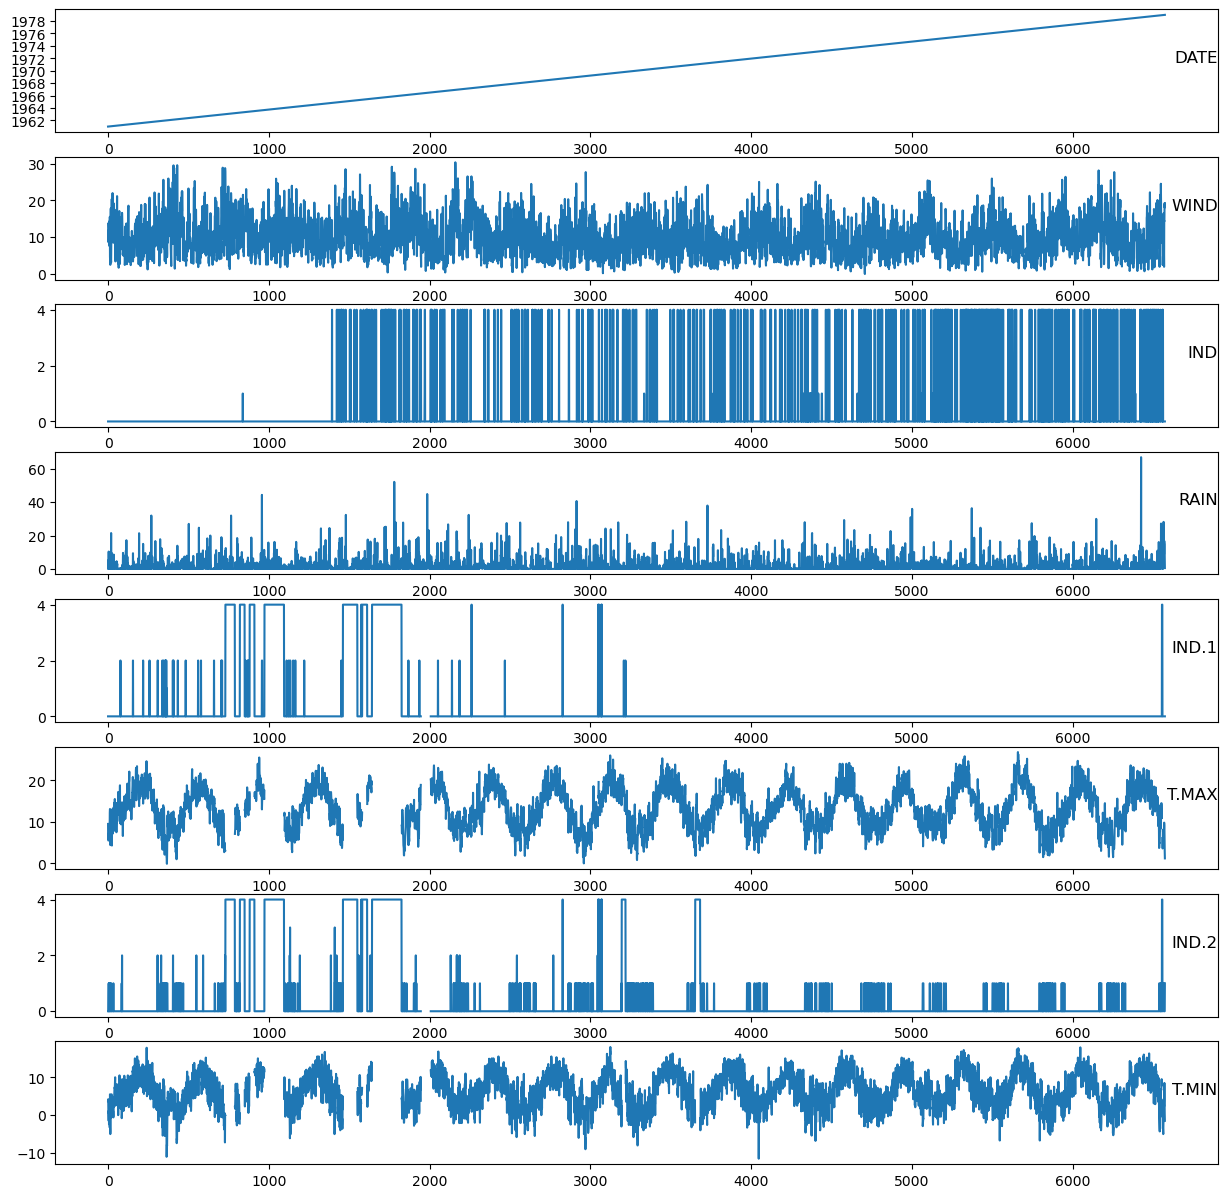

In [108]:
from matplotlib import pyplot
values = df.values
groups = [0, 1, 2, 3,4, 5, 6, 7]
i = 1

pyplot.figure(figsize=(15,15))
for group in groups:
    pyplot.subplot(len(groups), 1, i)
    pyplot.plot(values[:, group])
    pyplot.title(df.columns[group], y=0.5, loc='right')
    i += 1
pyplot.show()
# her columnu plot edelim

In [109]:
#Replace NaN with 0
df=df.fillna(0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6574 entries, 0 to 6573
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   DATE     6574 non-null   datetime64[ns]
 1   WIND     6574 non-null   float64       
 2   IND      6574 non-null   int64         
 3   RAIN     6574 non-null   float64       
 4   IND.1    6574 non-null   float64       
 5   T.MAX    6574 non-null   float64       
 6   IND.2    6574 non-null   float64       
 7   T.MIN    6574 non-null   float64       
 8   T.MIN.G  6574 non-null   float64       
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 462.4 KB


In [110]:
train_df,test_df = df[1:4601], df[4601:] 

In [111]:
#Scaling the values
train = train_df
scalers={}
for i in train_df.columns:
    scaler = MinMaxScaler(feature_range=(-1,1))
    s_s = scaler.fit_transform(train[i].values.reshape(-1,1))
    s_s=np.reshape(s_s,len(s_s))
    scalers['scaler_'+ i] = scaler
    train[i]=s_s
test = test_df
for i in train_df.columns:
    scaler = scalers['scaler_'+i]
    s_s = scaler.transform(test[i].values.reshape(-1,1))
    s_s=np.reshape(s_s,len(s_s))
    scalers['scaler_'+i] = scaler
    test[i]=s_s

In [112]:
def split_series(series, n_past, n_future):
  
  X, y = list(), list()
  for window_start in range(len(series)):
    past_end = window_start + n_past
    future_end = past_end + n_future
    if future_end > len(series):
      break
    past, future = series[window_start:past_end, :], series[past_end:future_end, :]
    X.append(past)
    y.append(future)
  return np.array(X), np.array(y)

In [113]:
n_past = 10
n_future = 5
n_features = 9 

X_train, y_train = split_series(train.values, n_past, n_future)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], n_features))
y_train = y_train.reshape((y_train.shape[0], y_train.shape[1], n_features))
X_test, y_test = split_series(test.values, n_past, n_future)
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], n_features))
y_test = y_test.reshape((y_test.shape[0], y_test.shape[1], n_features))

In [114]:
len(df)

6574

In [115]:
6574*0.7

4601.799999999999

### model deneyelim
#### lstm

In [116]:
encoder_inputs = tf.keras.layers.Input(shape=(n_past, n_features))
encoder_l1 = tf.keras.layers.LSTM(100, return_state=True)
encoder_outputs1 = encoder_l1(encoder_inputs)

encoder_states1 = encoder_outputs1[1:]

decoder_inputs = tf.keras.layers.RepeatVector(n_future)(encoder_outputs1[0])

decoder_l1 = tf.keras.layers.LSTM(100, return_sequences=True)(decoder_inputs,initial_state = encoder_states1)
decoder_outputs1 = tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(n_features))(decoder_l1)

model_e1d1 = tf.keras.models.Model(encoder_inputs,decoder_outputs1)

model_e1d1.summary()

Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6       │ (None, 10, 9)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_8 (LSTM)       │ [(None, 100),     │     44,000 │ input_layer_6[0]… │
│                     │ (None, 100),      │            │                   │
│                     │ (None, 100)]      │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ repeat_vector_2     │ (None, 5, 100)    │          0 │ lstm_8[0][0]      │
│ (RepeatVector)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_9 (LSTM)       │ (None, 5, 100)    │     80,400 │ repeat_vector_2[… │
│                     │                   │            │ lstm_8[0][1],     │
│                     │                   │            │ lstm_8[0][2]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ time_distributed_2  │ (None, 5, 9)      │        909 │ lstm_9[0][0]      │
│ (TimeDistributed)   │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 125,309 (489.49 KB)

 Trainable params: 125,309 (489.49 KB)

 Non-trainable params: 0 (0.00 B)

In [117]:
encoder_inputs = tf.keras.layers.Input(shape=(n_past, n_features))
encoder_l1 = tf.keras.layers.LSTM(100,return_sequences = True, return_state=True)
encoder_outputs1 = encoder_l1(encoder_inputs)
encoder_states1 = encoder_outputs1[1:]
encoder_l2 = tf.keras.layers.LSTM(100, return_state=True)
encoder_outputs2 = encoder_l2(encoder_outputs1[0])
encoder_states2 = encoder_outputs2[1:]

decoder_inputs = tf.keras.layers.RepeatVector(n_future)(encoder_outputs2[0])

decoder_l1 = tf.keras.layers.LSTM(100, return_sequences=True)(decoder_inputs,initial_state = encoder_states1)
decoder_l2 = tf.keras.layers.LSTM(100, return_sequences=True)(decoder_l1,initial_state = encoder_states2)
decoder_outputs2 = tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(n_features))(decoder_l2)

model_e2d2 = tf.keras.models.Model(encoder_inputs,decoder_outputs2)

model_e2d2.summary()

Model: "functional_14"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7       │ (None, 10, 9)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_10 (LSTM)      │ [(None, 10, 100), │     44,000 │ input_layer_7[0]… │
│                     │ (None, 100),      │            │                   │
│                     │ (None, 100)]      │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_11 (LSTM)      │ [(None, 100),     │     80,400 │ lstm_10[0][0]     │
│                     │ (None, 100),      │            │                   │
│                     │ (None, 100)]      │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ repeat_vector_3     │ (None, 5, 100)    │          0 │ lstm_11[0][0]     │
│ (RepeatVector)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_12 (LSTM)      │ (None, 5, 100)    │     80,400 │ repeat_vector_3[… │
│                     │                   │            │ lstm_10[0][1],    │
│                     │                   │            │ lstm_10[0][2]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_13 (LSTM)      │ (None, 5, 100)    │     80,400 │ lstm_12[0][0],    │
│                     │                   │            │ lstm_11[0][1],    │
│                     │                   │            │ lstm_11[0][2]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ time_distributed_3  │ (None, 5, 9)      │        909 │ lstm_13[0][0]     │
│ (TimeDistributed)   │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 286,109 (1.09 MB)

 Trainable params: 286,109 (1.09 MB)

 Non-trainable params: 0 (0.00 B)

In [118]:
reduce_lr = tf.keras.callbacks.LearningRateScheduler(lambda x: 1e-3 * 0.90 ** x)
model_e1d1.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.Huber())
history_e1d1=model_e1d1.fit(X_train,y_train,epochs=25,validation_data=(X_test,y_test),batch_size=32,verbose=0,callbacks=[reduce_lr])
model_e2d2.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.Huber())
history_e2d2=model_e2d2.fit(X_train,y_train,epochs=25,validation_data=(X_test,y_test),batch_size=32,verbose=0,callbacks=[reduce_lr])

In [119]:
pred_e1d1=model_e1d1.predict(X_test)
pred_e2d2=model_e2d2.predict(X_test)

62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [120]:
for index,i in enumerate(train_df.columns):
    scaler = scalers['scaler_'+i]
    pred_e1d1[:,:,index]=scaler.inverse_transform(pred_e1d1[:,:,index])
    pred_e2d2[:,:,index]=scaler.inverse_transform(pred_e2d2[:,:,index])
    y_train[:,:,index]=scaler.inverse_transform(y_train[:,:,index])
    y_test[:,:,index]=scaler.inverse_transform(y_test[:,:,index])

In [121]:
from sklearn.metrics import mean_absolute_error
for index,i in enumerate(train_df.columns):
  print(i)
  for j in range(1,6):
    print("Day ",j,":")
    print("MAE-E1D1 : ",mean_absolute_error(y_test[:,j-1,index],pred_e1d1[:,j-1,index]),end=", ")
    print("MAE-E2D2 : ",mean_absolute_error(y_test[:,j-1,index],pred_e2d2[:,j-1,index]))
  print()
  print()

DATE
Day  1 :
MAE-E1D1 :  1.961304704246277e+16, MAE-E2D2 :  4.144927978795519e+16
Day  2 :
MAE-E1D1 :  2.0142745268034492e+16, MAE-E2D2 :  3.84743253029344e+16
Day  3 :
MAE-E1D1 :  2.1695374502398336e+16, MAE-E2D2 :  3.995765267057019e+16
Day  4 :
MAE-E1D1 :  2.4764347748168616e+16, MAE-E2D2 :  4.1691208133646344e+16
Day  5 :
MAE-E1D1 :  2.834383802944529e+16, MAE-E2D2 :  4.366082237967885e+16


WIND
Day  1 :
MAE-E1D1 :  3.2069601579172504, MAE-E2D2 :  3.294048620202579
Day  2 :
MAE-E1D1 :  3.6280919554818944, MAE-E2D2 :  3.61044607993472
Day  3 :
MAE-E1D1 :  3.7314833976566457, MAE-E2D2 :  3.710065841567705
Day  4 :
MAE-E1D1 :  3.756885156295566, MAE-E2D2 :  3.7461599575177087
Day  5 :
MAE-E1D1 :  3.775486421404961, MAE-E2D2 :  3.7704339500688175


IND
Day  1 :
MAE-E1D1 :  0.8962664594450673, MAE-E2D2 :  0.9202597576966999
Day  2 :
MAE-E1D1 :  0.8976873812960264, MAE-E2D2 :  0.9121683849979262
Day  3 :
MAE-E1D1 :  0.8939677833476317, MAE-E2D2 :  0.9252395935968941
Day  4 :
MAE-E1D1 :

# Prophet ile yazmayı deneyelim

#### veriyi tekrar eda ile incelemiyorum gerek yok

In [122]:
from prophet import Prophet

In [123]:
df = pd.read_csv("wind_dataset.csv")
df = df.fillna(0)

In [124]:
df['DATE'] = pd.to_datetime(df['DATE'])

In [125]:
prophet_df = df[['DATE', 'WIND']].rename(columns={'DATE': 'ds', 'WIND': 'y'})

In [126]:
train_df = prophet_df.iloc[:4600]
test_df = prophet_df.iloc[4600:] # %70 veriyorum tekrardan

In [127]:
model = Prophet()
model.fit(train_df)

future = model.make_future_dataframe(periods=len(test_df))
forecast = model.predict(future)

09:11:26 - cmdstanpy - INFO - Chain [1] start processing
09:11:26 - cmdstanpy - INFO - Chain [1] done processing


In [128]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
6569,1978-12-27,11.182348,5.411492,17.355238
6570,1978-12-28,10.958654,4.650184,16.860556
6571,1978-12-29,10.967958,5.208071,16.821684
6572,1978-12-30,11.195830,5.342791,17.139793
6573,1978-12-31,11.177363,4.810637,17.133136


In [129]:
result = test_df.copy()
result['forecast'] = forecast['yhat'].iloc[-len(test_df):].values
result

,ds,y,forecast
4600,1973-08-06,11.79,7.347113
4601,1973-08-07,12.21,7.487350
4602,1973-08-08,7.54,7.480774
4603,1973-08-09,15.63,7.399241
4604,1973-08-10,3.83,7.539976
...,...,...,...
6569,1978-12-27,14.46,11.182348
6570,1978-12-28,14.33,10.958654
6571,1978-12-29,19.17,10.967958
6572,1978-12-30,18.08,11.195830


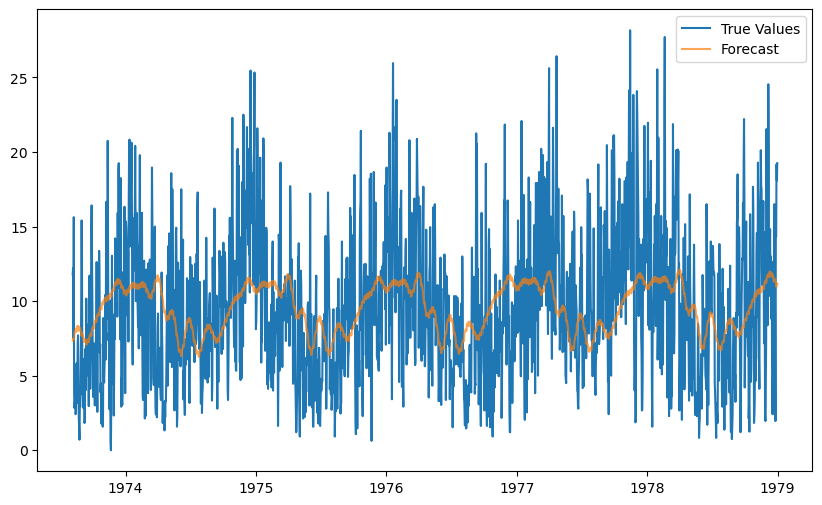

In [130]:
plt.figure(figsize=(10, 6))
plt.plot(result['ds'], result['y'], label='True Values')
plt.plot(result['ds'], result['forecast'], label='Forecast', alpha=0.7)
plt.legend()
plt.show()

# Vector AutoRegressor modeli deneyelim (bu kısma sonra tekrardan çalışıcam sönük oldu)

In [131]:
from statsmodels.tsa.api import VAR

In [132]:
df = pd.read_csv("wind_dataset.csv")
df['DATE'] = pd.to_datetime(df['DATE'])
df = df.fillna(0)

# Train-Test ayrımı
train_df, test_df = df.iloc[:4600], df.iloc[4600:]
train_df = train_df.set_index('DATE')
test_df = test_df.set_index('DATE')

In [133]:
# VAR modelini oluşturma ve eğitme
model = VAR(train_df)
model_fit = model.fit(maxlags=15, ic='aic')

model_fit.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 27, Jul, 2024
Time:                     09:11:27
--------------------------------------------------------------------
No. of Equations:         8.00000    BIC:                    6.62907
Nobs:                     4593.00    HQIC:                   6.21524
Log likelihood:          -65438.6    FPE:                    399.602
AIC:                      5.99046    Det(Omega_mle):         362.056
--------------------------------------------------------------------
Results for equation WIND
                coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------
const              4.422302         0.365913           12.086           0.000
L1.WIND            0.564720         0.015297           36.917           0.000
L1.IND            -0.159954         0.062897           -2.543           0

In [134]:
lag_order = model_fit.k_ar
forecast_input = train_df.values[-lag_order:]

forecast = model_fit.forecast(y=forecast_input, steps=len(test_df)) # %30un tahminini yapalım bir de

In [135]:
forecast

array([[ 9.55266753,  0.06378108,  4.39556508, ..., -0.01543079,
        11.50998846,  9.3815299 ],
       [ 8.10158764,  0.28360884,  3.21364672, ..., -0.02039369,
        10.92537286,  7.4931426 ],
       [ 7.7258477 ,  0.15826915,  2.63795197, ..., -0.01153433,
        10.79917848,  7.50807657],
       ...,
       [ 9.85050142,  0.26503545,  1.89530169, ...,  0.61507569,
         5.42660365,  2.87209366],
       [ 9.85050142,  0.26503545,  1.89530169, ...,  0.61507569,
         5.42660365,  2.87209366],
       [ 9.85050142,  0.26503545,  1.89530169, ...,  0.61507569,
         5.42660365,  2.87209366]])

In [136]:
forecast_df = pd.DataFrame(forecast, index=test_df.index, columns=train_df.columns)

for column in train_df.columns:
    print(f"{column} MAE: {mean_absolute_error(test_df[column], forecast_df[column])}")

WIND MAE: 3.906025529973642
IND MAE: 0.8573557416841663
RAIN MAE: 2.372508176595585
IND.1 MAE: 0.4837922129929917
T.MAX MAE: 4.155117807068208
IND.2 MAE: 0.5821403294401369
T.MIN MAE: 3.871971683744898
T.MIN.G MAE: 4.610361004310869


In [137]:
forecast_df

,WIND,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G
DATE,,,,,,,,
1973-08-06,9.552668,0.063781,4.395565,0.013188,18.659194,-0.015431,11.509988,9.381530
1973-08-07,8.101588,0.283609,3.213647,-0.001429,18.750422,-0.020394,10.925373,7.493143
1973-08-08,7.725848,0.158269,2.637952,0.018053,18.860291,-0.011534,10.799178,7.508077
1973-08-09,8.542325,0.245038,2.515923,0.037089,18.800234,-0.002889,11.014660,7.815644
1973-08-10,8.210873,0.246371,2.409757,0.040170,18.786216,0.058227,10.768525,7.429480
...,...,...,...,...,...,...,...,...
1978-12-27,9.850501,0.265035,1.895302,0.498695,11.645762,0.615076,5.426604,2.872094
1978-12-28,9.850501,0.265035,1.895302,0.498695,11.645762,0.615076,5.426604,2.872094
1978-12-29,9.850501,0.265035,1.895302,0.498695,11.645762,0.615076,5.426604,2.872094


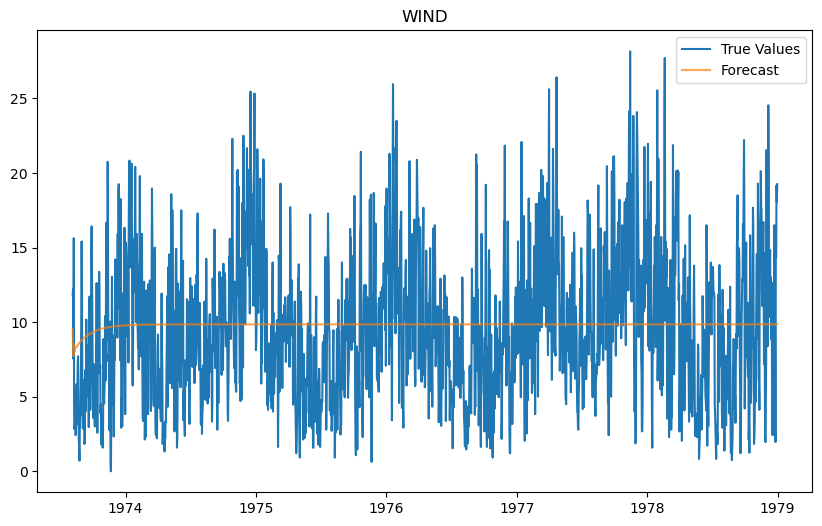

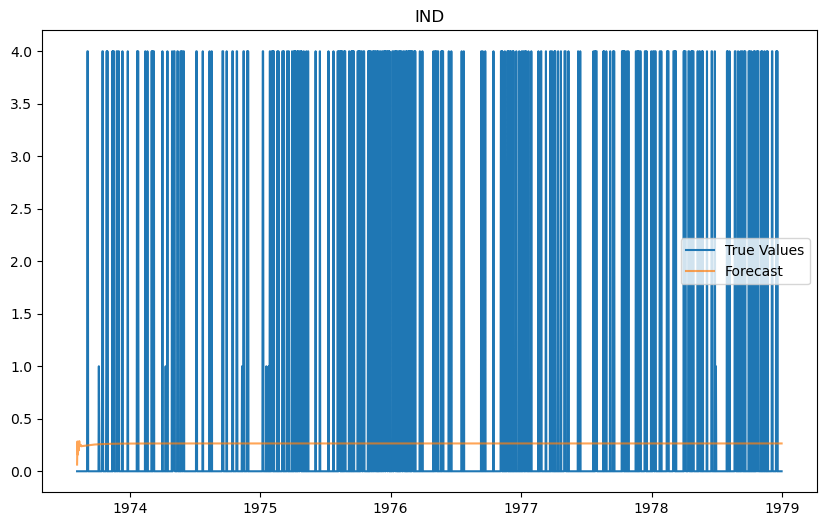

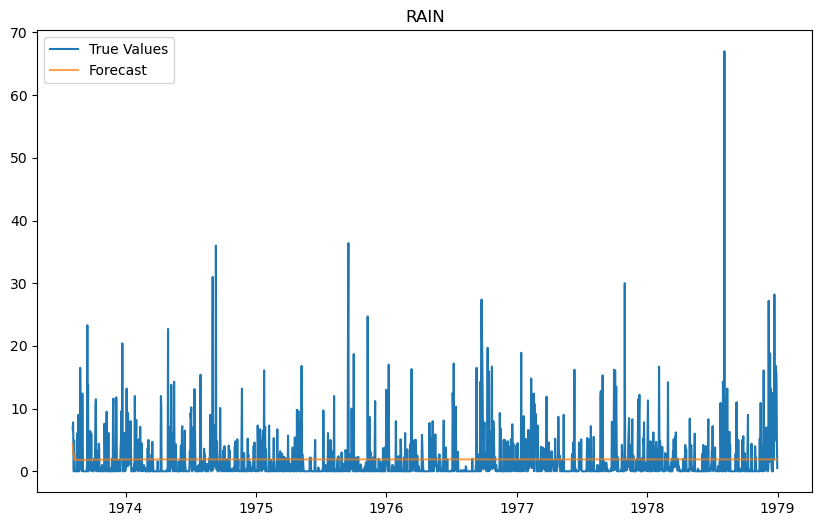

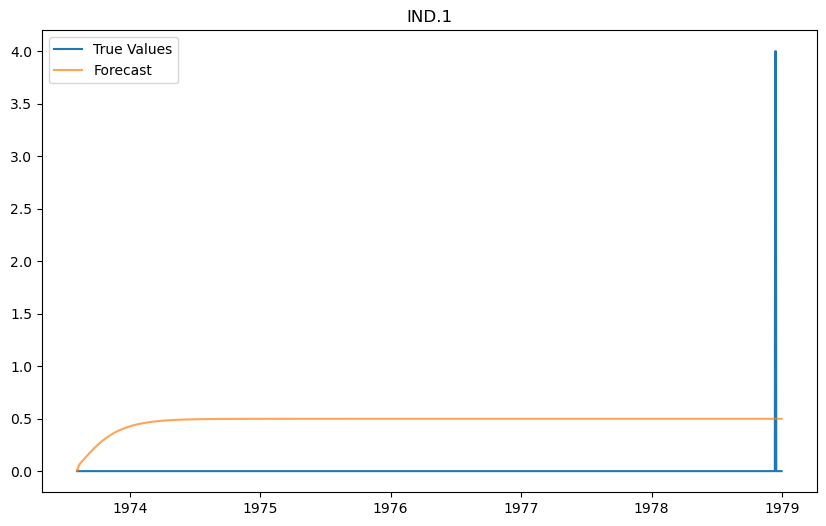

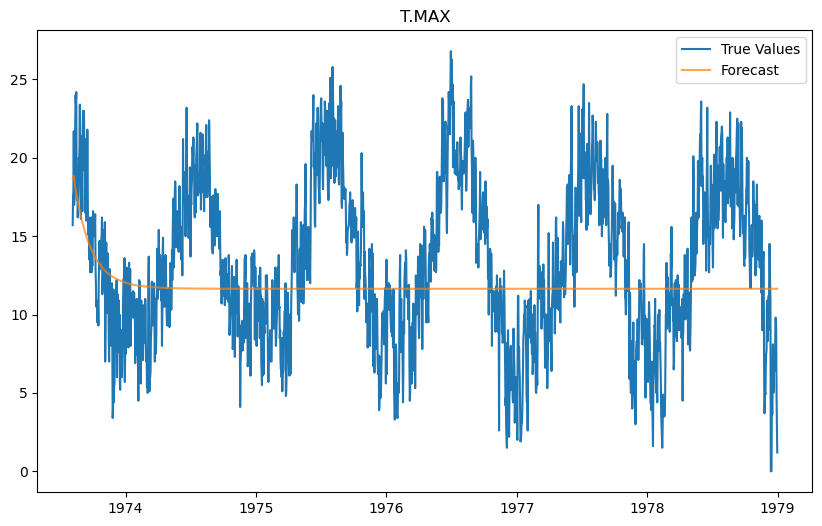

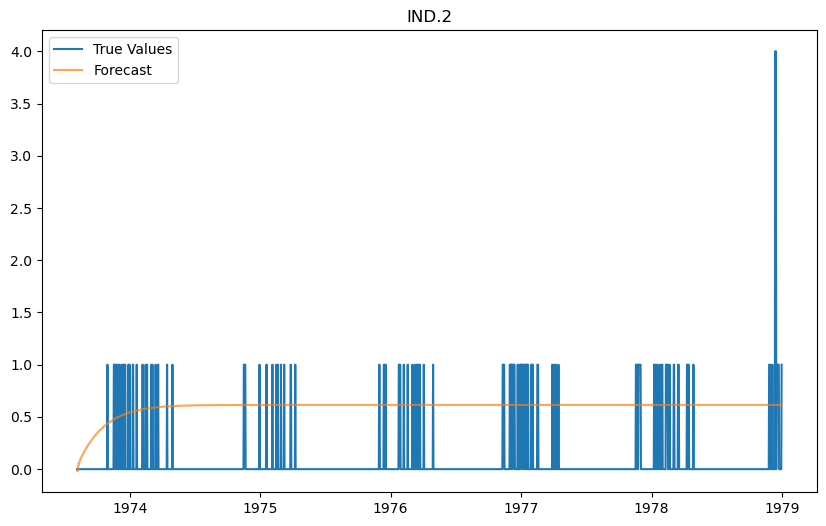

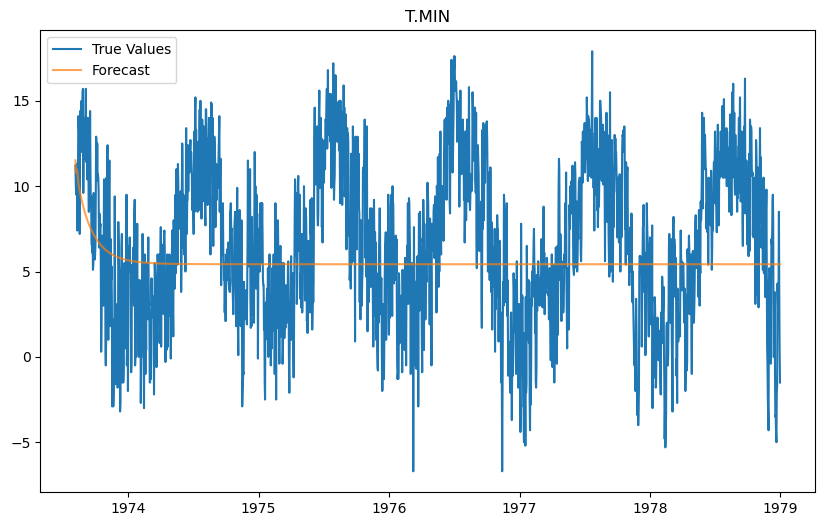

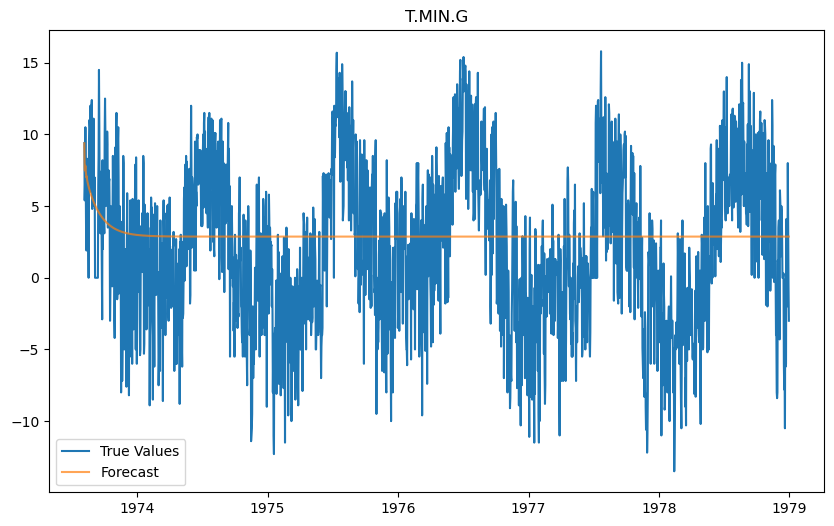

In [138]:
for column in train_df.columns:
    plt.figure(figsize=(10, 6))
    plt.plot(test_df.index, test_df[column], label='True Values')
    plt.plot(forecast_df.index, forecast_df[column], label='Forecast', alpha=0.7)
    plt.title(column)
    plt.legend()
    plt.show()

### aşırı kötü çalıştı inanılmaz kötü oldu

# NARX (Nonlinear Autoregressive with Exogenous Inputs) modeli ile deneyelim

In [139]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

df = pd.read_csv("wind_dataset.csv")

df['DATE'] = pd.to_datetime(df['DATE'])

df = df.fillna(0)

features = df[['IND', 'RAIN', 'IND.1', 'T.MAX', 'IND.2', 'T.MIN', 'T.MIN.G']]
target = df['WIND']

In [140]:
scalers = {}
for column in features.columns:
    scaler = MinMaxScaler(feature_range=(-1, 1))
    features[column] = scaler.fit_transform(features[[column]])
    scalers[column] = scaler

target_scaler = MinMaxScaler(feature_range=(-1, 1))
target = target_scaler.fit_transform(target.values.reshape(-1, 1))

In [141]:
train_size = 4600
test_size = len(df) - train_size

features_train = features.iloc[:train_size].values
target_train = target[:train_size]
features_test = features.iloc[train_size:].values
target_test = target[train_size:]

In [142]:
# NARX Modeli İçin Geriye Dönük Veri Penceresi Fonksiyonu
def create_lagged_features(features, target, n_lags):
    X, y = [], []
    for i in range(n_lags, len(features)):
        X.append(features[i-n_lags:i])
        y.append(target[i])
    return np.array(X), np.array(y)

In [143]:
n_lags = 10
X_train, y_train = create_lagged_features(features_train, target_train, n_lags)
X_test, y_test = create_lagged_features(features_test, target_test, n_lags)

# NARX Modeli
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(LSTM(50, activation='relu'))
model.add(Dense(2))
model.compile(optimizer='adam', loss='mse')

In [144]:
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1, validation_split=0.1)

Epoch 1/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1289 - val_loss: 0.0829
Epoch 2/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1051 - val_loss: 0.0855
Epoch 3/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1048 - val_loss: 0.0835
Epoch 4/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1019 - val_loss: 0.0827
Epoch 5/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1011 - val_loss: 0.0827
Epoch 6/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0985 - val_loss: 0.0858
Epoch 7/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1022 - val_loss: 0.0837
Epoch 8/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1033 - val_loss: 0.0816
Epoch 9/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0991 - val_loss: 0.0841
Epoch 10/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0981 - val_loss: 0.0844
Epoch 11/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1010 - val_loss: 0.0830
Epoch 12/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

In [145]:
predictions = model.predict(X_test)

62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [146]:
# Verileri eski ölçeğine döndürme
predictions = target_scaler.inverse_transform(predictions)
y_test = target_scaler.inverse_transform(y_test.reshape(-1, 1))

In [147]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, predictions)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")

Mean Absolute Error (MAE): 4.140013594317616
Mean Squared Error (MSE): 27.971981152636243
Root Mean Squared Error (RMSE): 5.288854427249463
Mean Absolute Percentage Error (MAPE): 35744856573573.09


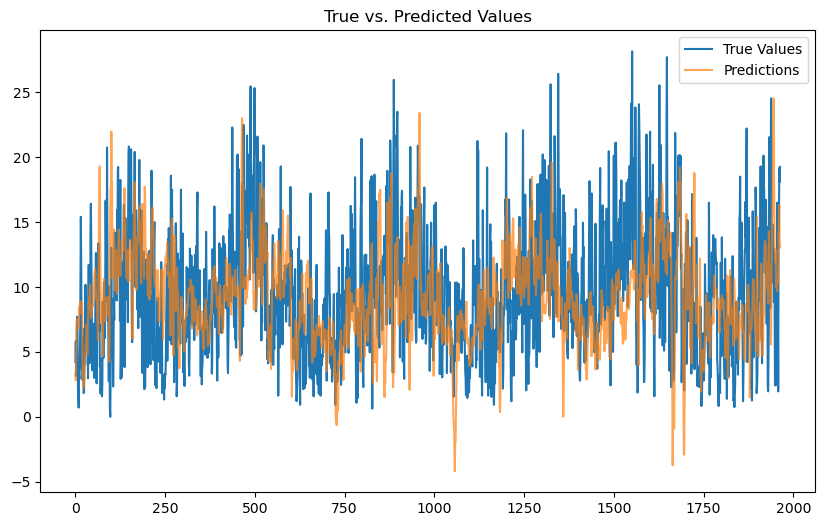

In [148]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test)), y_test, label='True Values')
plt.plot(range(len(predictions)), predictions, label='Predictions', alpha=0.7)
plt.title('True vs. Predicted Values')
plt.legend()
plt.show()

# Sonuçlar iyi çıktı sayılır. Bir Multivariate RNN modeli de deneyelim

In [149]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

In [150]:
df = pd.read_csv("wind_dataset.csv")
df['DATE'] = pd.to_datetime(df['DATE'])
df = df.fillna(0)
features = df[['IND', 'RAIN', 'IND.1', 'T.MAX', 'IND.2', 'T.MIN', 'T.MIN.G']]
target = df['WIND']

scalers = {}
for column in features.columns:
    scaler = MinMaxScaler(feature_range=(-1, 1))
    features[column] = scaler.fit_transform(features[[column]])
    scalers[column] = scaler

target_scaler = MinMaxScaler(feature_range=(-1, 1))
target = target_scaler.fit_transform(target.values.reshape(-1, 1))

In [151]:
train_size = 4600
test_size = len(df) - train_size

features_train = features.iloc[:train_size].values
target_train = target[:train_size]
features_test = features.iloc[train_size:].values
target_test = target[train_size:]

In [152]:
def create_lagged_features(features, target, n_lags):
    X, y = [], []
    for i in range(n_lags, len(features)):
        X.append(features[i-n_lags:i])
        y.append(target[i])
    return np.array(X), np.array(y)

In [153]:
n_lags = 10
X_train, y_train = create_lagged_features(features_train, target_train, n_lags)
X_test, y_test = create_lagged_features(features_test, target_test, n_lags)

In [154]:
model = Sequential()
model.add(SimpleRNN(100, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(SimpleRNN(100, activation='relu'))
model.add(Dense(2))
model.compile(optimizer='adam', loss='mse')

model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_7 (SimpleRNN)        │ (None, 10, 100)        │        10,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_8 (SimpleRNN)        │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,001 (121.10 KB)

 Trainable params: 31,001 (121.10 KB)

 Non-trainable params: 0 (0.00 B)

In [155]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1, validation_split=0.1)

Epoch 1/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1378 - val_loss: 0.0855
Epoch 2/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0999 - val_loss: 0.0833
Epoch 3/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1026 - val_loss: 0.0825
Epoch 4/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1015 - val_loss: 0.0828
Epoch 5/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1024 - val_loss: 0.0927
Epoch 6/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0992 - val_loss: 0.0845
Epoch 7/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0965 - val_loss: 0.0817
Epoch 8/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1004 - val_loss: 0.0847
Epoch 9/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0931 - val_loss: 0.0836
Epoch 10/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0925 - val_loss: 0.0852
Epoch 11/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0943 - val_loss: 0.0883
Epoch 12/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

In [156]:
predictions = model.predict(X_test)

62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [157]:
predictions = target_scaler.inverse_transform(predictions)
y_test = target_scaler.inverse_transform(y_test.reshape(-1, 1))

In [158]:
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, predictions)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")

Mean Absolute Error (MAE): 4.5422853272080665
Mean Squared Error (MSE): 33.378455639955725
Root Mean Squared Error (RMSE): 5.7774090767363635
Mean Absolute Percentage Error (MAPE): 33861830507076.453


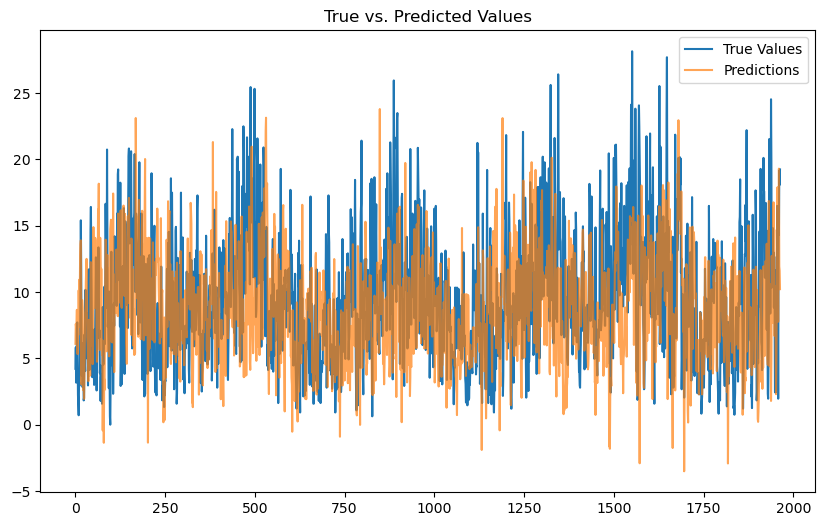

In [159]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test)), y_test, label='True Values')
plt.plot(range(len(predictions)), predictions, label='Predictions', alpha=0.7)
plt.title('True vs. Predicted Values')
plt.legend()
plt.show()

# Geleneklerimizden şaşmayalım SARIMA yazalım

In [160]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [161]:
df = pd.read_csv("wind_dataset.csv")

df['DATE'] = pd.to_datetime(df['DATE'])
df.set_index('DATE', inplace=True)
df = df.fillna(0)

features = df[['IND', 'RAIN', 'IND.1', 'T.MAX', 'IND.2', 'T.MIN', 'T.MIN.G']]
target = df['WIND']

train_size = 4600
test_size = len(df) - train_size

target_train = target[:train_size]
target_test = target[train_size:]
features_train = features.iloc[:train_size]
features_test = features.iloc[train_size:]

In [96]:
sarima_model = SARIMAX(target_train, 
                       order=(1, 1, 1),   # (p, d, q)
                       seasonal_order=(1, 1, 1, 365),  # (P, D, Q, s)
                       exog=features_train)  
sarima_fit = sarima_model.fit(disp=False)

predictions = sarima_fit.predict(start=len(target_train), end=len(target_train) + len(target_test) - 1, exog=features_test)

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


KeyboardInterrupt: 

### SARIMA modelinde bi rezillik oldu aşırı uzun süren ve kasan bir çalışma gerçekleştiriyor. tekrardan inceleyip çözeceğim

In [ ]:
mae = mean_absolute_error(target_test, predictions)
mse = mean_squared_error(target_test, predictions)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(target_test, predictions)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(target_test.index, target_test, label='True Values')
plt.plot(target_test.index, predictions, label='Predictions', alpha=0.7)
plt.title('True vs. Predicted Values')
plt.legend()
plt.show()